In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random
import seaborn as sns
from collections import Counter
import pprint

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
# reading the files
vc_df = pd.read_excel('Insofe assignment.xlsx', 'VC Companies')
non_vc_df = pd.read_excel('Insofe assignment.xlsx', 'Non VC companies')

In [4]:
# creating target classes
vc_df['venture_firm'] = 0
non_vc_df['venture_firm'] = 1

In [5]:
# joining the data together
df = pd.concat((vc_df, non_vc_df), axis=0)

In [6]:
df.sample(15, random_state=0)

,company_name,url,venture_firm
18,The Argentum Group (New York),www.argentumgroup.com,0
69,"IT Group, Inc.",www.theitgroup.com,1
6,"Alpine Group, Inc.",www.alpine-group.net,1
92,Pacific Private Capital LLC,www.pacificprivatecap.com,0
76,"Kettle Restaurants, Inc.",www.kettle.com,1
83,"Liberty Homes, Inc.",www.libertyhomesinc.com,1
5,Thomas H. Lee Partners LP,www.thl.com,0
39,"Divi Hotels Marketing, Inc.",www.diviresorts.com,1
12,Warburg Pincus LLC,www.warburgpincus.com,0
60,"Graybar Electric Co., Inc.",www.graybar.com,1


From the sample, we can see that features can be generated from the urls and company names. We can find the correlation between these features and the target class to test our hypothesis.

#### Types of companies in our data

In [7]:
company_type = [name.split()[-1] for name in df['company_name']]
pprint.pprint(Counter(company_type))

Counter({'Inc.': 69,
         'LLC': 42,
         'Corp.': 22,
         'LP': 18,
         'Co.': 11,
         'Ltd.': 7,
         'LLP': 6,
         'Partners': 4,
         'Trust': 2,
         'America': 2,
         '(Hawaii)': 1,
         'York)': 1,
         'Associates': 1,
         'Foundation': 1,
         'Brown': 1,
         'Ventures': 1,
         'Co': 1,
         'SAS': 1,
         '(Virginia)': 1,
         'Park': 1,
         'Louisiana)': 1,
         'Group': 1,
         'Capital': 1,
         '(Missouri)': 1,
         'LLLP': 1,
         'Center': 1})


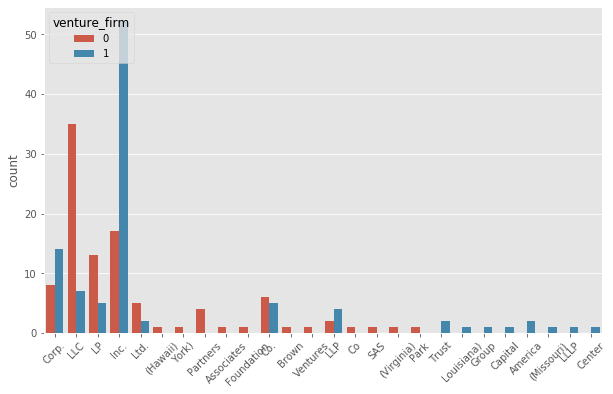

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(company_type, hue=df['venture_firm'])
plt.xticks(rotation=45)
plt.show()

As we can see, there is a correlation between the type of company and whether it is a venture firm or not.

In [9]:
# creating company type feature
df['company_type'] = company_type

In [10]:
df['company_type'].value_counts()

Inc.          69
LLC           42
Corp.         22
LP            18
Co.           11
Ltd.           7
LLP            6
Partners       4
America        2
Trust          2
Park           1
(Missouri)     1
Ventures       1
Foundation     1
(Hawaii)       1
Louisiana)     1
Brown          1
Associates     1
Co             1
York)          1
LLLP           1
Group          1
Capital        1
(Virginia)     1
Center         1
SAS            1
Name: company_type, dtype: int64

As we can see here, in the low frequency list only "SAS" and "LLLP" indicate company types, rest don't.

In [11]:
# checking the company type of companies with proper nouns in the type list
proper_nouns_list = df['company_type'].value_counts().index[6:].tolist()
df.loc[df['company_type'].isin(proper_nouns_list)]

,company_name,url,venture_firm,company_type
17,Trinity Investments LLC (Hawaii),www.trinityinvestments.com,0,(Hawaii)
18,The Argentum Group (New York),www.argentumgroup.com,0,York)
21,Marquette Venture Partners,www.marquetteventures.com,0,Partners
25,Venrock Associates,www.venrock.com,0,Associates
28,California HealthCare Foundation,www.chcf.org,0,Foundation
37,Forrest Binkley & Brown,www.fbbvc.com,0,Brown
39,Oxford Bioscience Partners,www.oxbio.com,0,Partners
42,Southern California Ventures,www.socalvc.com,0,Ventures
50,Epiris Managers LLP,www.epiris.co.uk,0,LLP
54,Blue Chip Venture Co,www.bcvc.com,0,Co


The dataframe above helps us define a definite list of company types in our data, namely:
1. Inc.
2. LLC.
3. Corp.
4. LP
5. Co.
6. Ltd.
7. LLP
8. SAS
9. LLLP

In [12]:
# changing company types based on the list above (redefining just to make sure and to account for the presence/ absence of "."
#                                                 in the name)
types_list = ['Inc', 'LLC', 'Corp', 'LP', 'Co', 'Ltd', 'LLP', 'SAS', 'LLLP']

for company_type in types_list:
    df.loc[df['company_name'].str.contains(company_type), 'company_type'] = company_type

df.loc[~df['company_type'].isin(types_list), 'company_type'] = 'Unknown'

In [13]:
df['company_type'].value_counts()

Co         61
Inc        56
LLC        36
LP         16
Unknown    15
Ltd         7
LLP         6
SAS         1
LLLP        1
Name: company_type, dtype: int64

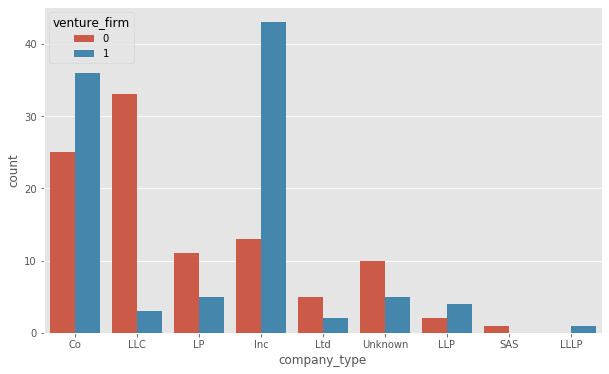

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(df['company_type'], hue=df['venture_firm'])
plt.show()

#### Types of domains used in the urls

In [15]:
# extracting the domain types
tld_list = [dom.split('.')[2] for dom in df['url']]
pprint.pprint(Counter(tld_list))

Counter({'com': 184,
         'net': 4,
         'ca': 3,
         'org': 2,
         'co': 2,
         'com/main/pnw/aboutus/eldorado/default': 1,
         'alcatel': 1,
         'com/index2': 1,
         'com/about/financial-reports': 1})


Almost all domains have ".com" tld. They don't seem to be of much value as a feature.

In [16]:
protocol_list = [dom.split('.')[0] for dom in df['url']]
pprint.pprint(Counter(protocol_list))

Counter({'www': 199})


All urls use the same standard protocol. Hence, we can safely assume that every second word after the first dot is the company name.

In [17]:
df['url'].sample(5)

26       www.stephensgroup.com
55    www.galleryofhistory.com
29             www.comarco.com
97         www.dsppartners.com
25             www.venrock.com
Name: url, dtype: object

In [18]:
# checking class imbalance
print(len(df.loc[df['venture_firm'] == 1]))
print(len(df.loc[df['venture_firm'] == 0]))

99
100


#### Creating a corpus of words

We will now create a corpus of documents where each document is essecntially the bag of words scraped from each url and store it in a dictionary. Here, the eac url is a dictionary key and it's bag of words is the value for the corresponding key.

In [19]:
# cleaning up the url feature column
import re
pattern = re.compile('www..*\.*\.(com|net|ca|org|co)')
df['url'] = [pattern.search(url).group() for url in df['url']]

In [20]:
import requests, bs4

In [21]:
from selenium.webdriver import Chrome
webdriver = r'C:\Users\Sudeep\Desktop\python\selenium_chrome_driver\chromedriver'
browser = Chrome(webdriver)

#### Web Scraping

In [22]:
# list of html tags to extract from
tags_list = ['header', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'p', 'span']

In [23]:
# creating corpus of words
import time
start = time.time()
corpus = {}
for url in df['url']:
    try:
        site_name = 'http://' + url
        browser.get(site_name)
        soup = bs4.BeautifulSoup(browser.page_source, 'html.parser')
        corpus[url] = ''
        for tag in tags_list:
            if len(soup.select(tag)) > 0:
                for i in range(len(soup.select(tag))):
                    corpus[url] = corpus[url] + ' ' + soup.select(tag)[i].text
    except:
        df.drop(df.loc[df['url'] == url].index, inplace=True)    # for handling unresponsive urls

In [24]:
# for reusability
import pickle
pickle_out = open('corpus.pickle','wb')
pickle.dump(corpus, pickle_out)
# pickle_in = open('corpus.pickle', 'rb')
# corpus = pickle.load(pickle_in)

#### Text preprocessing

In [25]:
# stop words creation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stop = stopwords.words('english')
for char in ['\"', "\'", '\\', '\a', '\b', '\f', '\n', '\r', '\t', '$']:
    stop.append(char)
for symbol in string.punctuation:
    stop.append(symbol)
tfidf = TfidfVectorizer(stop_words=stop)
lemmatizer = WordNetLemmatizer()

In [26]:
def create_document(keys, corpus, stop_words_list):
    doc = []
    for key in keys:
        try:
            text = corpus[key]
            text = word_tokenize(text)
            text = [lemmatizer.lemmatize(word) for word in text]
            text = [re.sub('([^\x00-\x7F])+', ' ', word) for word in text] # remove non-english characters
            text = [re.sub(r'\d+', ' ', word) for word in text] # remove numbers
            text = [re.sub(r'_.*', ' ', word) for word in text] # remove unintelligible words
            text = [word for word in text if word not in stop_words_list] # remove stop words
            text = ' '.join([word for word in text])
            doc.append(text)
        except:
            pass
    return doc

In [27]:
# get documents
doc = create_document(list(corpus), corpus, stop)

# converting documents to vectors
tfidf_vectors = tfidf.fit_transform(doc)

#### Extracting the keyterms by ranking each term and using word cloud

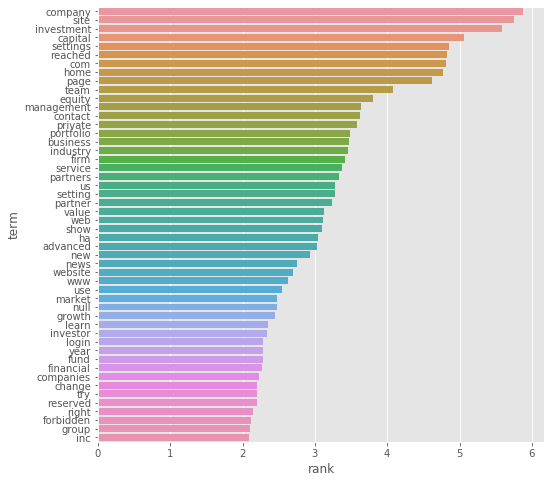

In [28]:
# using data to get word importances
terms = tfidf.get_feature_names()
sums = tfidf_vectors.sum(axis=0)
term_list = []

for col, term in enumerate(terms):
    term_list.append((term, sums[0,col]))

ranking = pd.DataFrame(term_list, columns=['term', 'rank'])
ranking = ranking.sort_values('rank', ascending=False)
first_50 = ranking.iloc[:50]
plt.figure(figsize=(8,8))
sns.barplot(first_50['rank'], first_50['term'])
plt.show()

There is a lot of noise, but we can trim that.

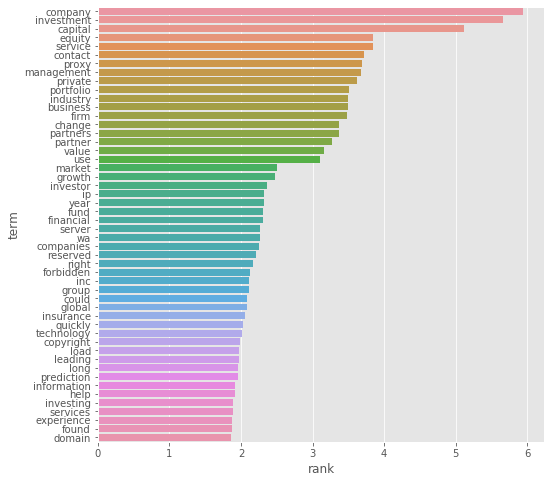

In [29]:
# adding to the noise filter
list_of_noise = [
    'try', 'www', 'null', 'learn', 'login', 'website', 'news', 'advanced', 'setting', 'home', 'com', 'reached', 
    'page', 'team', 'site', 'settings', 'target', 'company_name', 'web', 'address', 'new', 'search', 'us', 'show', 'ha'
]
for noise in list_of_noise:
    stop.append(noise)
    
tfidf = TfidfVectorizer(stop_words=stop)
doc = create_document(list(corpus), corpus, stop)
tfidf_vectors = tfidf.fit_transform(doc)

terms = tfidf.get_feature_names()
sums = tfidf_vectors.sum(axis=0)
term_list = []

for col, term in enumerate(terms):
    term_list.append((term, sums[0,col]))

ranking = pd.DataFrame(term_list, columns=['term', 'rank'])
ranking = ranking.sort_values('rank', ascending=False)
first_50 = ranking.iloc[:50]
plt.figure(figsize=(8,8))
sns.barplot(first_50['rank'], first_50['term'])
plt.show()

In [30]:
# collecting tfidf data into a dataframe
dense = tfidf_vectors.todense()
data = pd.DataFrame(dense)
data.columns = terms
data['company_type'] = df['company_type'].tolist()
data['target'] = df['venture_firm'].tolist()

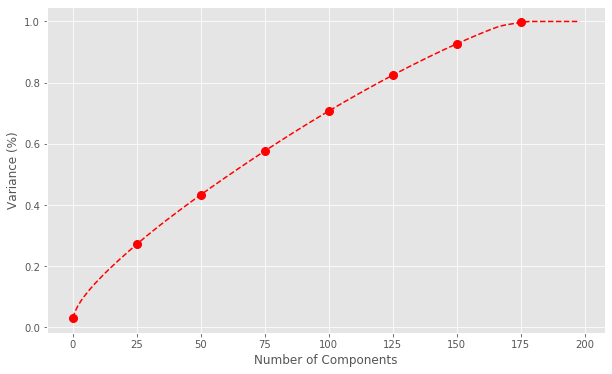

In [31]:
plt.figure(figsize=(10, 6))
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(dense)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r--', markevery=25, marker='o', markersize='8.0')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.show()

Selecting no. of components based on this graph.

#### Preprocessing

In [32]:
def compress_data(tfidf_vectors, pca_components):
    pca = PCA(pca_components)
    compressed = pd.DataFrame(data=pca.fit_transform(dense), columns=['component {}'.format(i)
                                                                                             for i in range(1, pca_components+1)])
    compressed = pd.concat((compressed, data['target']), axis=1)
#     print(len(compressed.columns)) # for debugging purposes
    return compressed

In [33]:
def data_preprocess(tfidf_vectors, pca_components):
    compressed = compress_data(tfidf_vectors, pca_components)
    X = compressed.drop('target', axis=1)
    y = compressed['target']
    X['company_type'] = df['company_type'].tolist()
    X = pd.get_dummies(X)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=1) # stratified splitting
#     print(len(X_train.columns)) # for debugging purposes
#     print(len(X_test.columns))
    return X_train, X_test, y_train, y_test

#### Machine Learning

In [34]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, auc

In [35]:
def modelling(model):
    print(str(model))
    accuracy = cross_val_score(model, X_train, y_train, cv=50).mean()
    accuracy = np.round(accuracy, 3)
    print('The mean accuracy over {} folds is: {}'.format(50, accuracy))
    f1 = cross_val_score(model, X_train, y_train, scoring='f1', cv=50).mean()
    f1 = np.round(f1, 3)
    print('The mean f1 score over {} folds is: {}'.format(50, f1))
    model.fit(X_train, y_train)
    train_score = np.round(model.score(X_train, y_train), 3)
    test_score = np.round(model.score(X_test, y_test), 3)
#     print('train score: {}'.format(train_score))
#     print('test score: {}'.format(test_score))
    print('\n')
    print('Train Data Classification Report')
    print('================================')
    print(classification_report(y_train, model.predict(X_train)))
    probs = model.predict_proba(X_train)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_train, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic Train Data')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print('Test Data Classification Report')
    print('===============================')
    print(classification_report(y_test, model.predict(X_test)))
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic Test Data')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [36]:
X_train, X_test, y_train, y_test = data_preprocess(tfidf_vectors, 175)

#### Logistic Regression

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
The mean accuracy over 50 folds is: 0.73
The mean f1 score over 50 folds is: 0.717


Train Data Classification Report
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        75
           1       0.82      0.93      0.87        74

    accuracy                           0.87       149
   macro avg       0.87      0.87      0.87       149
weighted avg       0.87      0.87      0.87       149



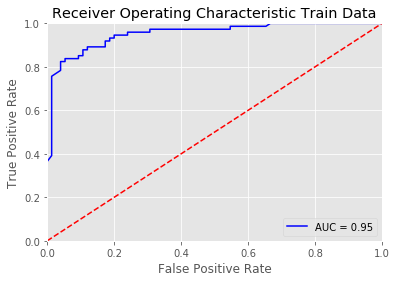

Test Data Classification Report
              precision    recall  f1-score   support

           0       0.77      0.68      0.72        25
           1       0.71      0.80      0.75        25

    accuracy                           0.74        50
   macro avg       0.74      0.74      0.74        50
weighted avg       0.74      0.74      0.74        50



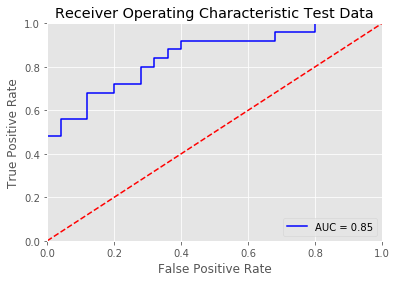

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', solver='liblinear')
modelling(logreg)

#### Hyperparameter tuning

In [38]:
params = {
    'C': [round(x, 1) for x in np.linspace(0.1, 1.0, 10)],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],
    'class_weight': ['balanced'],
    'l1_ratio': [round(x, 1) for x in np.linspace(0.1, 1.0, 10)]
}
gsv = GridSearchCV(logreg, params, cv=10)
gsv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0],
                         'class_weight': ['balanced'],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1.0],
                         'penalty': ['l1', 'l2

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=0.1,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
The mean accuracy over 50 folds is: 0.8
The mean f1 score over 50 folds is: 0.765


Train Data Classification Report
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        75
           1       0.79      0.92      0.85        74

    accuracy                           0.84       149
   macro avg       0.85      0.84      0.84       149
weighted avg       0.85      0.84      0.84       149



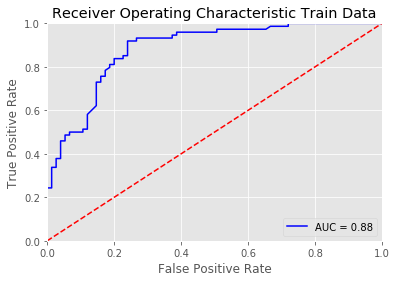

Test Data Classification Report
              precision    recall  f1-score   support

           0       0.72      0.52      0.60        25
           1       0.62      0.80      0.70        25

    accuracy                           0.66        50
   macro avg       0.67      0.66      0.65        50
weighted avg       0.67      0.66      0.65        50



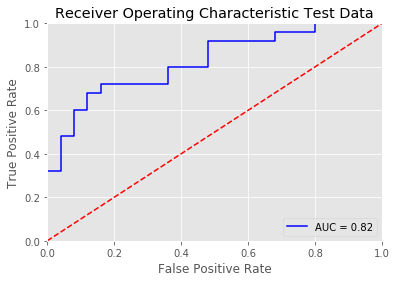

In [39]:
logreg = LogisticRegression(**gsv.best_params_)
modelling(logreg)

#### Most important keywords related to non vc firms

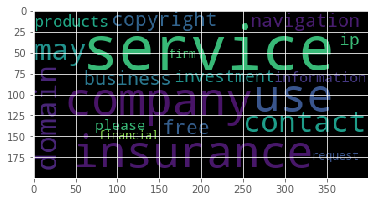

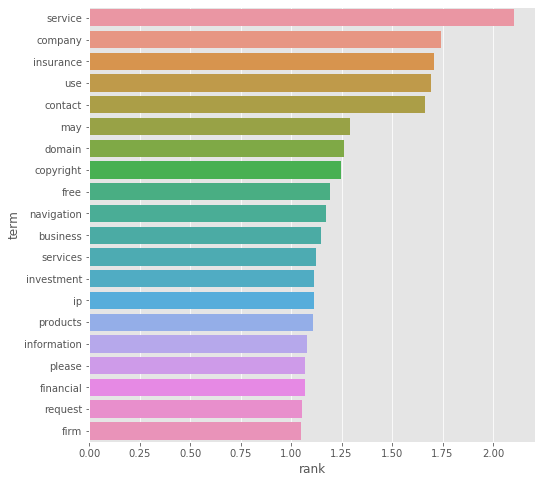

In [40]:
# ranking and arranging
terms = tfidf.get_feature_names()
sums = np.matrix(data.loc[data['target'] == 1].drop('company_type', axis=1)).sum(axis=0)
count_list = []

for col, term in enumerate(terms):
    count_list.append((term, sums[0,col]))

ranking = pd.DataFrame(count_list, columns=['term', 'rank'])
ranking = ranking.sort_values('rank', ascending=False)

# word cloud
from wordcloud import WordCloud
list_of_imp_terms = ranking.head(20)['term'].tolist()
words = ' '.join([word for word in list_of_imp_terms])
cloud = WordCloud().generate(words)
plt.imshow(cloud)
plt.show()

# barplot
first_20 = ranking.iloc[:20]
plt.figure(figsize=(8,8))
sns.barplot(first_20['rank'], first_20['term'])
plt.show()

#### Most important keywords related to vc firms

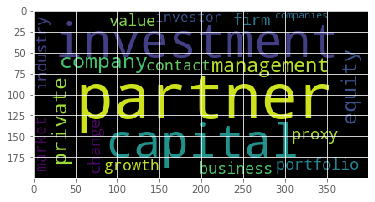

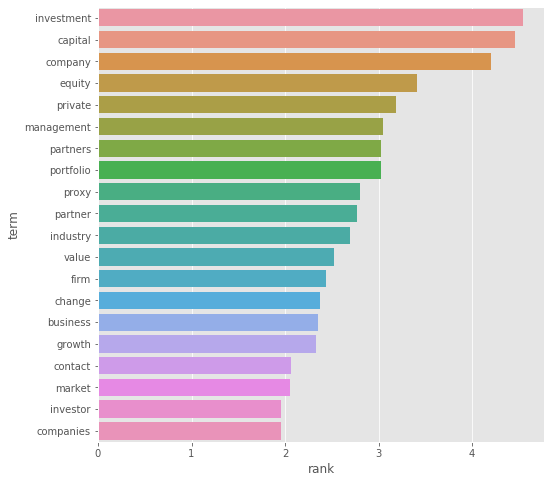

In [41]:
# ranking and arranging
terms = tfidf.get_feature_names()
sums = np.matrix(data.loc[data['target'] == 0].drop('company_type', axis=1)).sum(axis=0)
count_list = []

for col, term in enumerate(terms):
    count_list.append((term, sums[0,col]))

ranking = pd.DataFrame(count_list, columns=['term', 'rank'])
ranking = ranking.sort_values('rank', ascending=False)

# word cloud
list_of_imp_terms = ranking.head(20)['term'].tolist()
words = ' '.join([word for word in list_of_imp_terms])
cloud = WordCloud().generate(words)
plt.imshow(cloud)
plt.show()

# barplot
first_20 = ranking.iloc[:20]
plt.figure(figsize=(8,8))
sns.barplot(first_20['rank'], first_20['term'])
plt.show()